# **Plants Seedling Classification**



### **Context:**
In recent times, the field of agriculture has been in urgent need of modernizing, since theamount of manual work people need to put in to check if plants are growing correctly is stillhighly extensive. Despite several advances in agricultural technology, people working in theagricultural industry still need to have the ability to sort and recognize different plants andweeds, which takes a lot of time and effort in the long term.
The potential is ripe for this trillion-dollar industry to be greatly impacted by technologicalinnovations that cut down on the requirement for manual labor, and this is where ArtificialIntelligence can benefit the workers in this field,
as the time and energy required to identifyplant seedlings will be greatly shortened by the use of AI and Deep Learning
. The ability to doso far more efficiently and even more effectively than experienced manual labor could lead tobetter crop yields, the freeing up of human involvement for higher-order agricultural decisionmaking, and in the long term will result in more sustainable environmental practices inagriculture as well.

### **Objective:**

The Aarhus University Signal Processing group, in collaboration with the University of SouthernDenmark, has provided the data containing images of unique plants belonging to 12 differentspecies. You being a data scientist, need to build a Convolutional Neural Network model whichwould classify the plant seedlings into their respective 12 categories.

### **Data Description:**

This dataset contains images of 12 different species of plants
- images.npy
- Label.csv

**List of Species**
- Black-Grass
- Charlock
- Cleavers
- Common Chickweed
- Fat Hen
- Loose Silky-Bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small Flowered Cranesbill
- Sugar Beet






## **Importing the necessary libraries**

In [1]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
#from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **Reading the dataset**

In [2]:
images = np.load('images.npy')
labels = pd.read_csv('Labels.csv')

## **Overview of the dataset**


Let's print the shape of the images and labels 

In [4]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


There are 4750 RGB  images of shape 128 x 128 X 3, each image having 3 channels.

## Plotting images 

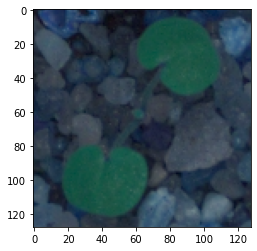

In [5]:
plt.imshow(images[5])

- Now we will convert these BGR images to RGB images so we could interpret them easily.

In [6]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

## **Exploratory Data Analysis** 

In [7]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

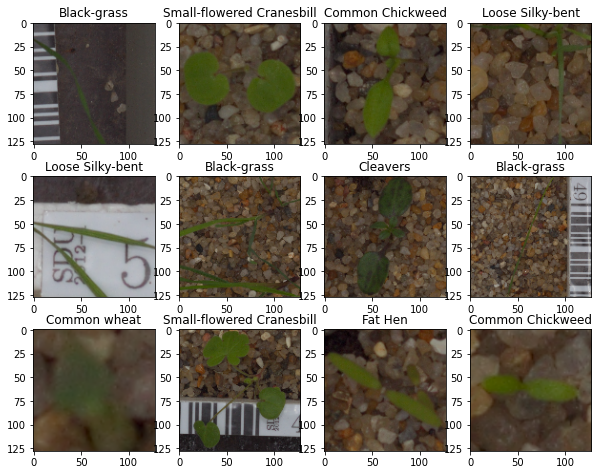

In [8]:
plot_images(images,labels)

* Notice the Common Wheat is hazy , and the Black-Grass is barely visable. 

<b> Checking for data imbalance

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

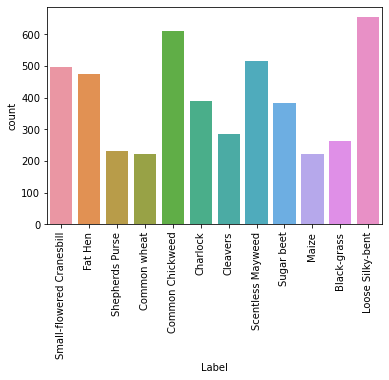

In [9]:
 sns.countplot(labels['Label'])
 plt.xticks(rotation='vertical')

- As you can see from the above plot, the dataset is imbalanced. 
- Loose Silky-bent has the most observations
- Common Chickweed is close to Loose Silky-Bent in count
- Common Wheat has the fewest 
- Shepherds Purse is close to Common wheat on count

### Resizing images - I have decided to keep the code for conversion to 64 however for reference only
* For this dataset i chose to stick with the original format in order to hopefully attain a higher accuracy
- below is documentation i would use if i were to reduce the size from 128 to 64. I would also have to make the appropriate changes in the Models
***
As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [11]:
# images_decreased=[]
# height = 64
# width = 64
# dimensions = (width, height)  
# for i in range(len(images)):
#  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

### Since i am keeping the original format, I will simply identify images_decreased as images for my code

In [12]:
# trial to keep the images at 128
images_decreased = images

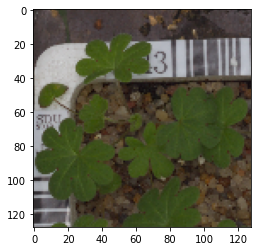

In [13]:
plt.imshow(images_decreased[3])

## Visualizing images using Gaussian Blur 

In [14]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))


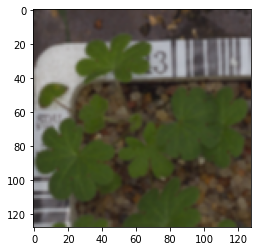

In [15]:
plt.imshow(images_gb[3])

- It appears that GaussianBlur would be ineffective because the blurred or denoised image does not seem to contain any relevant information, and the model would struggle to categorize these blurred images. I believe the increased image clarity may provide a better result so i will keep the images as they were.

## **Splitting the dataset**

- As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.


In [16]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)


In [17]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 128, 128, 3) (3847, 1)
(428, 128, 128, 3) (428, 1)
(475, 128, 128, 3) (475, 1)


## **Making the data compatible:**

- Convert labels from names to one hot vectors
- Normalizing the values


## Encoding the target labels

In [18]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder 

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

## Data Normalization
Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [19]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0


## **Model Building - Convolutional Neural Network (CNN)**
Let's create a CNN model sequentially, where we will be adding the layers one after another.

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data. 

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Also, let's fix the seed again after clearing the backend.

Let's **set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow** to be able to reproduce the same results every time we run the code.

## MODEL 1 (1)

In [20]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [21]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Now, let's build a **CNN Model** with the following 2 main parts - <br>

1. **The Feature Extraction layers** which are comprised of convolutional and pooling layers.
2. **The Fully Connected classification layers** for prediction.<br><br>


In [22]:
# Intializing a sequential model
model = Sequential()



# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

# model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
# Adding max pooling to reduce the size of output from the second conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

# model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(32, 64, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
# Adding max pooling to reduce the size of output from the third conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer   
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0

### <b> Fitting the model on the train data

In [23]:
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 111s - loss: 2.3849 - accuracy: 0.1230 - val_loss: 2.2455 - val_accuracy: 0.1869 - 111s/epoch - 915ms/step
Epoch 2/30
121/121 - 105s - loss: 2.1892 - accuracy: 0.1926 - val_loss: 2.0165 - val_accuracy: 0.2967 - 105s/epoch - 864ms/step
Epoch 3/30
121/121 - 101s - loss: 2.0738 - accuracy: 0.2267 - val_loss: 1.8724 - val_accuracy: 0.2874 - 101s/epoch - 831ms/step
Epoch 4/30
121/121 - 107s - loss: 1.9640 - accuracy: 0.2443 - val_loss: 1.7623 - val_accuracy: 0.3154 - 107s/epoch - 882ms/step
Epoch 5/30
121/121 - 118s - loss: 1.8986 - accuracy: 0.2995 - val_loss: 1.7029 - val_accuracy: 0.3808 - 118s/epoch - 974ms/step
Epoch 6/30
121/121 - 113s - loss: 1.8253 - accuracy: 0.3257 - val_loss: 1.6143 - val_accuracy: 0.4065 - 113s/epoch - 933ms/step
Epoch 7/30
121/121 - 108s - loss: 1.8018 - accuracy: 0.3457 - val_loss: 1.6432 - val_accuracy: 0.4182 - 108s/epoch - 895ms/step
Epoch 8/30
121/121 - 110s - loss: 1.8132 - accuracy: 0.3382 - val_loss: 1.5749 - val_accuracy: 0.4907 - 

### **Model Evaluation**

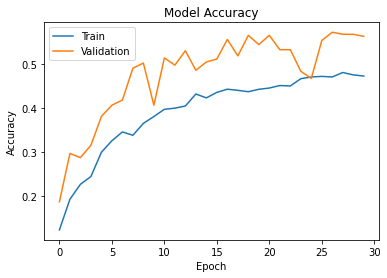

In [24]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** 


*   We can see from the above plot that **the training accuracy of the  model was poor , and the difference between validation reflects that we are clearly overfitting.**







### **Evaluating the model on test data**

In [25]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 3s - loss: 1.4262 - accuracy: 0.5768 - 3s/epoch - 196ms/step


### **Generating the predictions using test data**

In [26]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 3s 197ms/step


In [27]:
y_pred

array([[1.5096674e-24, 4.4103540e-12, 1.8034086e-21, ..., 1.4189529e-04,
        1.7536030e-07, 1.5041955e-08],
       [2.9868530e-02, 1.4179650e-01, 2.0281000e-01, ..., 4.9821712e-02,
        9.6715599e-02, 6.1684225e-02],
       [2.8436186e-02, 2.1874206e-08, 8.5705032e-08, ..., 1.3697319e-02,
        7.5390208e-01, 2.0152290e-06],
       ...,
       [2.3344564e-01, 4.2941248e-10, 1.2881234e-06, ..., 3.2003175e-08,
        6.5715087e-09, 4.3285334e-05],
       [6.7880808e-07, 1.6579659e-01, 9.3799469e-04, ..., 8.6277142e-02,
        1.2597741e-02, 1.1570263e-01],
       [2.4225020e-03, 2.2039682e-01, 7.0923701e-02, ..., 8.7497786e-02,
        1.0071649e-01, 7.9303250e-02]], dtype=float32)

### **Plotting the Confusion Matrix**

*   The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
*   The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
*   We will use the `argmax()` function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.





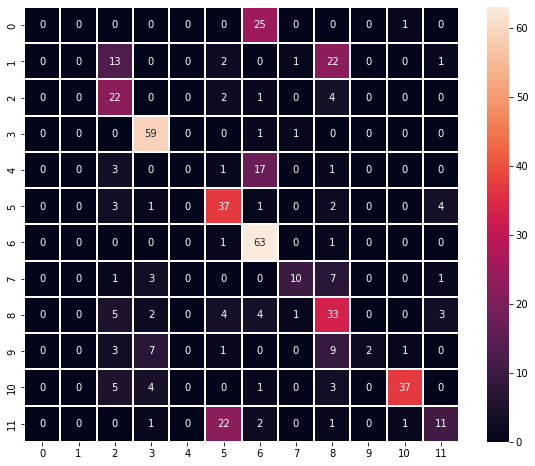

In [28]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>
- We observe that some of the classes are not predicted correctly. 
- In comparison to the rest, we can see that classes 0,1, 4,10 are well classified.
- We can also observe that classes 1,2,5,7 and 9 are mostly misclassified.

# Model-2(1)

As we can see, our initial model appears to overfit. Therefore we'll try to address this problem with data augmentation and Batch Normalization to check if we can improve the model's performance.

## **Data Augmentation**

In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs. To overcome this problem, one approach we might consider is **Data Augmentation**. CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. <br> Taking this attribute into account, we can augment the images using the techniques listed below - <br>
**1. Horizontal Flip** (should be set to True/False) <br>
**2. Vertical Flip** (should be set to True/False) <br>
**3. Height Shift** (should be between 0 and 1) <br>
**4. Width Shift** (should be between 0 and 1) <br>
**5. Rotation** (should be between 0 and 180) <br>
**6. Shear** (should be between 0 and 1) <br>
**7. Zoom** (should be between 0 and 1) etc. <br>

Remember, **data augmentation should not be used in the validation/test data set**.

In [41]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [42]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20, 
                              fill_mode='nearest'
                              )
# test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [43]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))
# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))
# Adding 2nd conv layer 64,3,3 with same padding
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
# Adding max pooling to reduce the size of the output of the second layer
model.add(MaxPooling2D((2, 2), padding = 'same'))
# Adding 3rd conv layer 32, 3, 3 with same padding 
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
# adding max pooling to reduce the size of the output of the third layer
model.add(MaxPooling2D((2, 2), padding = 'same'))
# model.add(BatchNormalization())
model.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())



# Adding a fully connected dense layer with 12 neurons    
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0

In [44]:
# Epochs
epochs = 30
# Batch size
batch_size = 128

history = model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/30
30/30 [==============================] - 154s 5s/step - loss: 2.3178 - accuracy: 0.1855 - val_loss: 2.4796 - val_accuracy: 0.0584
Epoch 2/30
30/30 [==============================] - 162s 5s/step - loss: 2.0414 - accuracy: 0.3025 - val_loss: 2.3701 - val_accuracy: 0.1285
Epoch 3/30
30/30 [==============================] - 164s 5s/step - loss: 1.8179 - accuracy: 0.3837 - val_loss: 2.2619 - val_accuracy: 0.1893
Epoch 4/30
30/30 [==============================] - 161s 5s/step - loss: 1.6339 - accuracy: 0.4415 - val_loss: 2.1582 - val_accuracy: 0.2523
Epoch 5/30
30/30 [==============================] - 168s 6s/step - loss: 1.5344 - accuracy: 0.4840 - val_loss: 2.0751 - val_accuracy: 0.2570
Epoch 6/30
30/30 [==============================] - 138s 4s/step - loss: 1.4606 - accuracy: 0.5125 - val_loss: 2.0743 - val_accuracy: 0.1869
Epoch 7/30
30/30 [==============================] - 118s 4s/step - loss: 1.3903 - accuracy: 0.5276 - val_loss: 1.8667 - val_accuracy: 0.3364
Epoch 8/30
30

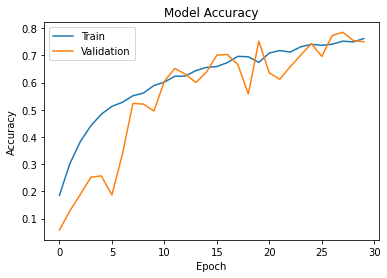

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [46]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 3s - loss: 0.7491 - accuracy: 0.7368 - 3s/epoch - 198ms/step


We can observe that our accuracy has improved compared to our previous model.

In [47]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 3s 203ms/step


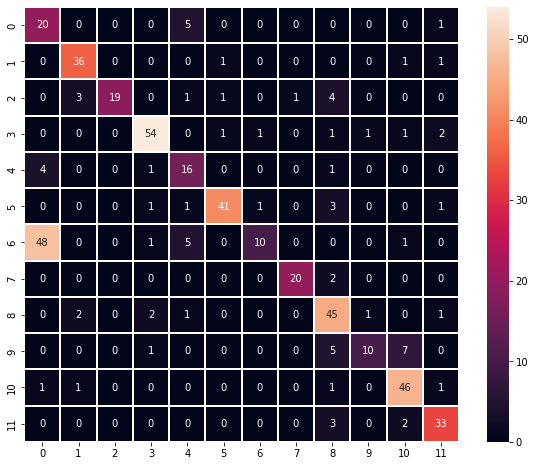

In [48]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Observation:**
- The confusion matrix appears to be improving as well,however we have 48 observations that incorrectly sleected 6 over 1
- 2,5,6,7, 9 did better
- We can observe that this model has outperformed our previous model.

# Transfer Learning using VGG16- MODEL 3(1) 

- Let's try again, but this time, we will be using the idea of **Transfer Learning**. We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with FC layers created specifically for our problem.


In [49]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (128,128,3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [50]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [51]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(128, activation='relu'))
new_model.add(Dense(64, activation='relu'))
new_model.add(Dense(32, activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(16, activation='relu'))
new_model.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1048704   
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 16)               

In [52]:
# Epochs
epochs = 30
# Batch size
batch_size = 128

history_vgg16 = new_model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/30
30/30 [==============================] - 206s 7s/step - loss: 2.3897 - accuracy: 0.1378 - val_loss: 2.2016 - val_accuracy: 0.2056
Epoch 2/30
30/30 [==============================] - 206s 7s/step - loss: 2.1248 - accuracy: 0.2485 - val_loss: 1.9835 - val_accuracy: 0.2850
Epoch 3/30
30/30 [==============================] - 191s 6s/step - loss: 1.9131 - accuracy: 0.3133 - val_loss: 1.8880 - val_accuracy: 0.3037
Epoch 4/30
30/30 [==============================] - 192s 6s/step - loss: 1.8049 - accuracy: 0.3512 - val_loss: 1.7129 - val_accuracy: 0.3949
Epoch 5/30
30/30 [==============================] - 195s 7s/step - loss: 1.6551 - accuracy: 0.4248 - val_loss: 1.6364 - val_accuracy: 0.4229
Epoch 6/30
30/30 [==============================] - 192s 6s/step - loss: 1.5604 - accuracy: 0.4555 - val_loss: 1.4743 - val_accuracy: 0.5070
Epoch 7/30
30/30 [==============================] - 189s 6s/step - loss: 1.4337 - accuracy: 0.4974 - val_loss: 1.3785 - val_accuracy: 0.5701
Epoch 8/30
30

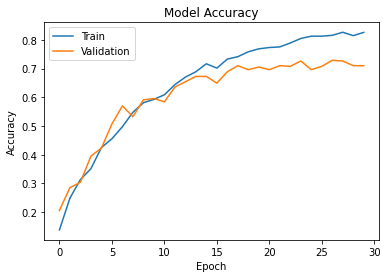

In [53]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

* graph shows the model performed well until around the 11th epoch then it started to increasingly overfit. 

In [54]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 23s - loss: 0.9551 - accuracy: 0.6989 - 23s/epoch - 2s/step


In [55]:
# Here we would get the output as probablities for each category
y_pred=new_model.predict(X_test_normalized)

15/15 [==============================] - 24s 2s/step


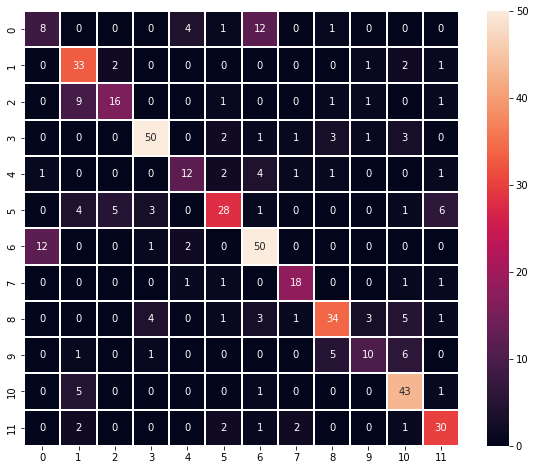

In [56]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

- According to the confusion matrix and accuracy curve, the VGG16 model has outperformed the first model but not the second.
- we are still getting issues with the 0 being assumed to be a 6 and 5 with 11
- overall its a solid model but we wish it had better test accuracy
- We will explore some additional models 


## **Visualizing the prediction:**

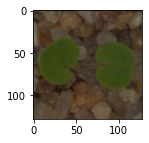

1/1 [==============================] - 0s 73ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


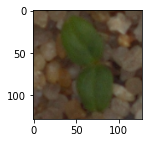

1/1 [==============================] - 0s 76ms/step
Predicted Label ['Cleavers']
True Label Cleavers


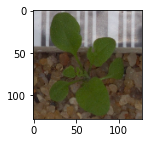

1/1 [==============================] - 0s 76ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Shepherds Purse


In [58]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[2].reshape(1,128,128,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[33].reshape(1,128,128,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[36].reshape(1,128,128,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Can we obtain better results by changing the parameters a little? Lets try 

In [150]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [151]:
images = np.load('images.npy')
labels = pd.read_csv('Labels.csv')

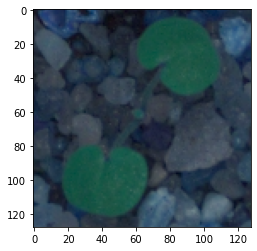

In [152]:
plt.imshow(images[5])

In [153]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

In [154]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

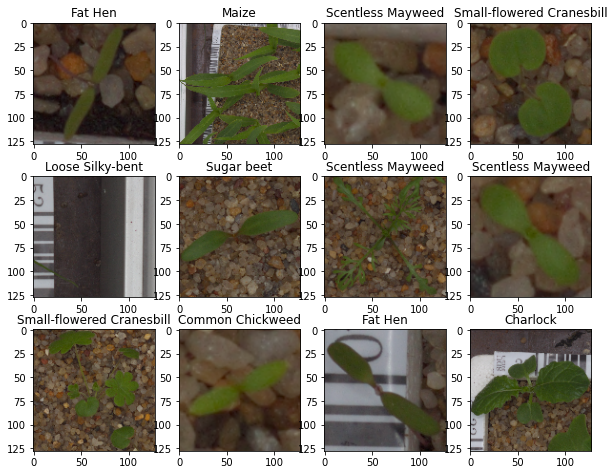

In [155]:
plot_images(images,labels)

### Resizing the images to 64 to compare with the performance of 128

In [94]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)  
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

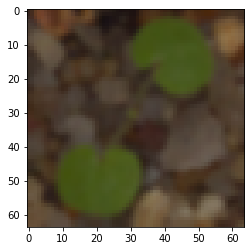

In [156]:
plt.imshow(images_decreased[5])

#### Visualizing with Gaussian Blur

In [97]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images_decreased[i], ksize =(3,3),sigmaX =  0))

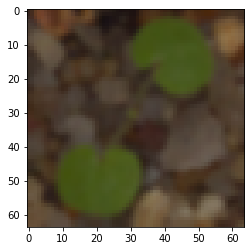

In [98]:
#plt.imshow(images_gb[5])

In [99]:
# using gaussian blur combined with reduced image size
# images_decreased = images_gb

### Exploratory Data Analysis 2 with Gaussian Blur and Reduced image size 

In [157]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

#### Quick second check on image imbalance ( should be the same as above)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

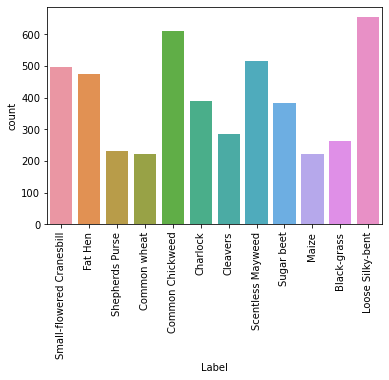

In [158]:
 sns.countplot(labels['Label'])
 plt.xticks(rotation='vertical')

* just a sanity check to insure consistantcy - which there seems to be. 

### Splitting the dataset 2

In [159]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)


In [160]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


## **Making the data compatible:**

- Convert labels from names to one hot vectors
- Normalizing the values


## Encoding the target labels

In [161]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder 

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

## Data Normalization
Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [162]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0


## **Model Building - Convolutional Neural Network (CNN)**
Let's create a CNN model sequentially, where we will be adding the layers one after another.

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data. 

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Also, let's fix the seed again after clearing the backend.

Let's **set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow** to be able to reproduce the same results every time we run the code.

## MODEL 1(2)

In [163]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [164]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Now, let's build a **CNN Model** with the following 2 main parts - <br>

1. **The Feature Extraction layers** which are comprised of convolutional and pooling layers.
2. **The Fully Connected classification layers** for prediction.<br><br>


In [165]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

### <b> Fitting the model on the train data

In [166]:
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=25,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/25
121/121 - 11s - loss: 2.4609 - accuracy: 0.1063 - val_loss: 2.4230 - val_accuracy: 0.1659 - 11s/epoch - 93ms/step
Epoch 2/25
121/121 - 11s - loss: 2.3723 - accuracy: 0.1609 - val_loss: 2.2809 - val_accuracy: 0.2243 - 11s/epoch - 88ms/step
Epoch 3/25
121/121 - 11s - loss: 2.2615 - accuracy: 0.2126 - val_loss: 2.1566 - val_accuracy: 0.2593 - 11s/epoch - 87ms/step
Epoch 4/25
121/121 - 10s - loss: 2.1656 - accuracy: 0.2472 - val_loss: 2.0391 - val_accuracy: 0.3294 - 10s/epoch - 84ms/step
Epoch 5/25
121/121 - 11s - loss: 2.1396 - accuracy: 0.2625 - val_loss: 2.0076 - val_accuracy: 0.3458 - 11s/epoch - 94ms/step
Epoch 6/25
121/121 - 28s - loss: 2.1113 - accuracy: 0.2716 - val_loss: 1.9412 - val_accuracy: 0.3481 - 28s/epoch - 232ms/step
Epoch 7/25
121/121 - 16s - loss: 2.0742 - accuracy: 0.2750 - val_loss: 1.9236 - val_accuracy: 0.3458 - 16s/epoch - 134ms/step
Epoch 8/25
121/121 - 13s - loss: 2.0384 - accuracy: 0.2807 - val_loss: 1.8489 - val_accuracy: 0.3575 - 13s/epoch - 107ms/st

### **Model Evaluation**

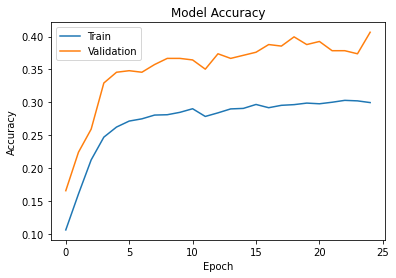

In [167]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** 

- overfitting and poor performance of this model make it unattractive

In [168]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.7322 - accuracy: 0.3916 - 322ms/epoch - 21ms/step


### **Generating the predictions using test data**

In [169]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 0s 22ms/step


In [170]:
y_pred

array([[1.23495556e-04, 1.56915423e-08, 3.83765428e-06, ...,
        2.15366129e-02, 2.88819795e-08, 3.29708983e-03],
       [2.70488225e-02, 1.61377624e-01, 9.79438424e-02, ...,
        6.17141128e-02, 2.08089679e-01, 8.91108513e-02],
       [2.70488225e-02, 1.61377624e-01, 9.79438424e-02, ...,
        6.17141128e-02, 2.08089679e-01, 8.91108513e-02],
       ...,
       [1.94034755e-01, 5.74378419e-06, 1.33195594e-02, ...,
        5.81309187e-08, 4.15284660e-07, 6.42788559e-02],
       [1.18328324e-02, 2.67561153e-03, 1.00741880e-02, ...,
        1.00998878e-01, 3.84461880e-03, 7.36787766e-02],
       [2.84542590e-02, 9.06332582e-02, 7.80580342e-02, ...,
        8.36099833e-02, 1.19319588e-01, 1.05911866e-01]], dtype=float32)

### **Plotting the Confusion Matrix**

*   The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
*   The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
*   We will use the `argmax()` function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.



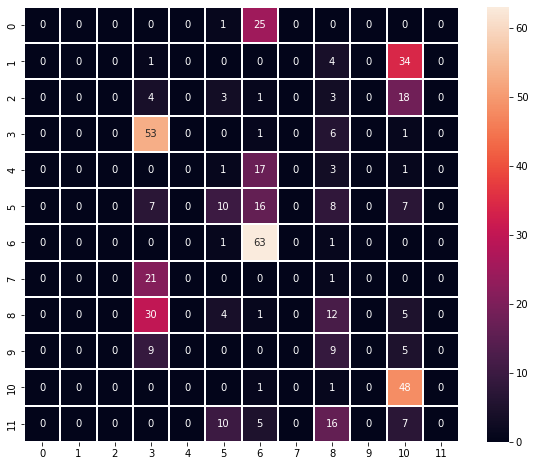

In [171]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>
- poor performance across the board, 10 and 6 were predicted with the most success, otherwise this was a poor model. 

# Model-2(2)

As we can see, our initial model appears to overfit. Therefore we'll try to address this problem with data augmentation and Batch Normalization to check if we can improve the model's performance.

## **Data Augmentation**

In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs. To overcome this problem, one approach we might consider is **Data Augmentation**. CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. <br> Taking this attribute into account, we can augment the images using the techniques listed below - <br>
**1. Horizontal Flip** (should be set to True/False) <br>
**2. Vertical Flip** (should be set to True/False) <br>
**3. Height Shift** (should be between 0 and 1) <br>
**4. Width Shift** (should be between 0 and 1) <br>
**5. Rotation** (should be between 0 and 180) <br>
**6. Shear** (should be between 0 and 1) <br>
**7. Zoom** (should be between 0 and 1) etc. <br>

Remember, **data augmentation should not be used in the validation/test data set**.

In [172]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [173]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20, 
                              fill_mode='nearest'
                              )
# test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [174]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))
# model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                        

In [175]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

history = model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/25
60/60 [==============================] - 13s 207ms/step - loss: 2.1930 - accuracy: 0.2096 - val_loss: 2.3795 - val_accuracy: 0.1752
Epoch 2/25
60/60 [==============================] - 12s 192ms/step - loss: 1.7501 - accuracy: 0.3732 - val_loss: 2.3000 - val_accuracy: 0.4790
Epoch 3/25
60/60 [==============================] - 11s 191ms/step - loss: 1.5519 - accuracy: 0.4526 - val_loss: 2.1640 - val_accuracy: 0.2944
Epoch 4/25
60/60 [==============================] - 12s 204ms/step - loss: 1.4178 - accuracy: 0.4885 - val_loss: 2.1187 - val_accuracy: 0.3107
Epoch 5/25
60/60 [==============================] - 17s 288ms/step - loss: 1.3172 - accuracy: 0.5258 - val_loss: 1.8893 - val_accuracy: 0.5701
Epoch 6/25
60/60 [==============================] - 14s 236ms/step - loss: 1.2225 - accuracy: 0.5570 - val_loss: 1.6353 - val_accuracy: 0.5350
Epoch 7/25
60/60 [==============================] - 13s 212ms/step - loss: 1.1931 - accuracy: 0.5673 - val_loss: 1.4560 - val_accuracy: 0.5397

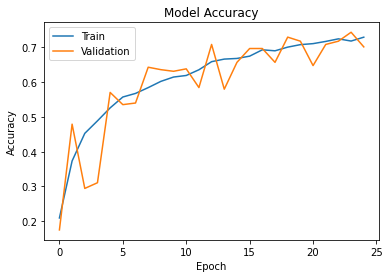

In [176]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

* Wild gyrations of the validation set does drive some concern of overfitting. 

In [177]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.0441 - accuracy: 0.7074 - 327ms/epoch - 22ms/step


- accuracy has improved compared to model1(2)

In [178]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 0s 24ms/step


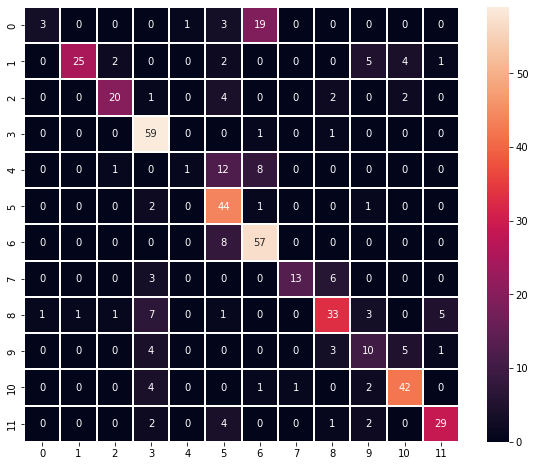

In [179]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

- This model performed moderately well. observation 3 and 8 had some lack of clarity along with 6 and 0 . However, it has been to date the best model 

# Transfer Learning using VGG16- MODEL 3(2)

In [180]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [181]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [182]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(32, activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(16, activation='relu'))
new_model.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                65568     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 12)                204       
                                                                 
Total params: 14,780,988
Trainable params: 66,300
Non-

In [183]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

history_vgg16 = new_model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/25
60/60 [==============================] - 62s 1s/step - loss: 2.3681 - accuracy: 0.1827 - val_loss: 2.2680 - val_accuracy: 0.2243
Epoch 2/25
60/60 [==============================] - 53s 892ms/step - loss: 2.1916 - accuracy: 0.2543 - val_loss: 2.0639 - val_accuracy: 0.3154
Epoch 3/25
60/60 [==============================] - 54s 891ms/step - loss: 1.9933 - accuracy: 0.3191 - val_loss: 1.9250 - val_accuracy: 0.3855
Epoch 4/25
60/60 [==============================] - 52s 858ms/step - loss: 1.8529 - accuracy: 0.3629 - val_loss: 1.8044 - val_accuracy: 0.3925
Epoch 5/25
60/60 [==============================] - 56s 936ms/step - loss: 1.7444 - accuracy: 0.4002 - val_loss: 1.7004 - val_accuracy: 0.3972
Epoch 6/25
60/60 [==============================] - 55s 918ms/step - loss: 1.6671 - accuracy: 0.4219 - val_loss: 1.6551 - val_accuracy: 0.4229
Epoch 7/25
60/60 [==============================] - 54s 902ms/step - loss: 1.5869 - accuracy: 0.4473 - val_loss: 1.5798 - val_accuracy: 0.4322
Ep

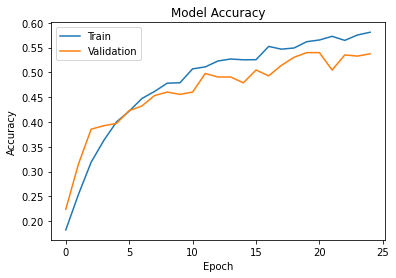

In [184]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

* model does shwo some consistancy - however the more epochs run the more overfitting that seems to occur. 

In [185]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 7s - loss: 1.2561 - accuracy: 0.5684 - 7s/epoch - 460ms/step


In [186]:
# Here we would get the output as probablities for each category
y_pred=new_model.predict(X_test_normalized)

15/15 [==============================] - 7s 438ms/step


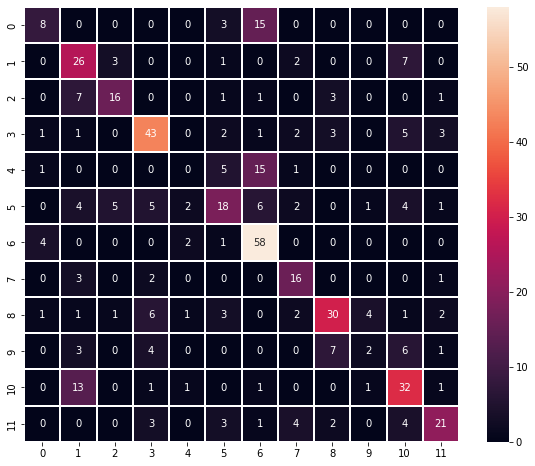

In [187]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

- model performed poorly- particularly on the 6th observation and the first observation

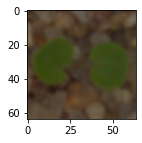

1/1 [==============================] - 0s 56ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


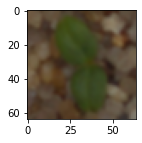

1/1 [==============================] - 0s 54ms/step
Predicted Label ['Cleavers']
True Label Cleavers


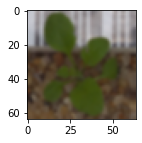

1/1 [==============================] - 0s 56ms/step
Predicted Label ['Charlock']
True Label Shepherds Purse


In [188]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

In [197]:
pd.DataFrame({'Models':['Base CNN Model','CNN Model with Data Augmentation','Transfer Learning Model'],'Train Accuracy':['47%','76%','83%'],'Validation Accuracy':['56%','75%','71%'],'Test Accuracy':['58%','74%','70%']})

,Models,Train Accuracy,Validation Accuracy,Test Accuracy
0,Base CNN Model,47%,56%,58%
1,CNN Model with Data Augmentation,76%,75%,74%
2,Transfer Learning Model,83%,71%,70%


In [200]:
pd.DataFrame({'Models(2)':['Base CNN Model-2','CNN Model with Data Augmentation- 2','Transfer Learning Model-2'],'Train Accuracy':['30%','74%','58%'],'Validation Accuracy':['41%','70%','71%'],'Test Accuracy':['39%','71%','57%']})

,Models(2),Train Accuracy,Validation Accuracy,Test Accuracy
0,Base CNN Model-2,30%,41%,39%
1,CNN Model with Data Augmentation- 2,74%,70%,71%
2,Transfer Learning Model-2,58%,71%,57%


## Observations- 
- CNN Model with Data Augmentation with 30 epoch and using the original size of the images performed the best of the models
- however the transfer model - while overfitting a little may be still a good production model due to the reduced GPU usage and time requirements. 
- CNN Model 2 performed second best. In this model we reduced the image size and ran only 25 epochs- The time requirements and GPU usage were much lower and the results were not drastically different. 
- In this case it seems that the Transfer model was successful on evaluation of higher resolution and higher epochs, however when we reduced both , the modeling became less than desireable. 

## Conclusion
- Higher performance can be obtained by running the CNN Model with Data Augmentation with 30 epochs. We did try separately to run with Gaussian blur, however we interrupted the runs because it was obvious that they were performing poorly. 
- running the Transfer learning model might be a good production model due to the reduced amount of resources and speed it may provide
- We would not recommend the use of the 2nd Transfer learning model as it performed on the test accuracy poorly
- the 3 models that peroformed adequately are 1. CNN Model with Data Aug ( model 1(1), Transfer learning (Model 1(1)) and CNN Data Augmentation Model 2(2))
- additional work on the parameters could yeild a better result , which is why we did run 3 additional models to compare for the use of further analysis. 

# Thank you ! 